In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(
    font="ABC Sans Nova",
    font_scale=1.25
)

pay_data = pd.read_excel(
    "./APS Agency Pay Scales - 31 December 2022.xlsx",
    header=2,
    skipfooter=4,
    index_col="AGENCY"
).iloc[:, 1:]
pay_data.index.name = "agency"
pay_data.columns = [
    [x.split(" ")[0] for x in pay_data.columns],
    [x.split(" ")[1].lower() for x in pay_data.columns]
]
pay_data.columns.names = ["level", "type"]


staff_data = pd.read_excel(
    "./APSED June 2022 All Tables.xlsx",
    sheet_name=10,
    header=[2, 3],
    skipfooter=2,
    index_col=0,
    na_values="."
).iloc[:-1, 4:-7]
staff_data.index.name = "agency"

def name_agencies(x):
    x = x.replace(" and ", " & ")
    if x[:2] != "- ":
        if "Attorney" in x:
            return "Attorney-General's Department"
        elif ("Treasury" in x) | ("Cabinet" in x): 
            return "Department of " + x
        else:
            return "Department of " + x
    else:
        return x.replace("- ", "")

staff_data.index = staff_data.index.map(name_agencies)
staff_data.columns = [
    [x[0].replace(" ", "") for x in staff_data.columns],
    [x[1].lower() for x in staff_data.columns]
]
staff_data.columns.names = ["level", "sex"]

keys = [
    ["AAT", "Administrative Appeals Tribunal"],
    ["ABCC", "Australian Building & Construction Commission"],
    ["ABS", "Australian Bureau of Statistics"],
    ["ACCC", "Australian Competition & Consumer Commission"],
    ["ACIAR", "Australian Centre for International Agricultural Research"],
    ["ACIC", "Australian Criminal Intelligence Commission"],
    ["ACLEI", "Australian Commission for Law Enforcement Integrity"],
    ["ACMA", "Australian Communications & Media Authority"],
    ["ACQSC", "Aged Care Quality & Safety Commission"],
    ["ACSQHC", "Australian Commission on Safety & Quality in Health Care"],
    ["ADHA", "Australian Digital Health Agency"],
    ["AEC", "Australian Electoral Commission"],
    ["AFMA", "Australian Fisheries Management Authority"],
    ["AFSA", "Australian Financial Security Authority"],
    ["AG's", "Attorney-General's Department"],
    ["AHL", "Aboriginal Hostels Limited"],
    ["AHRC", "Australian Human Rights Commission"],
    ["AIATSIS", "Australian Institute of Aboriginal & Torres Strait Islander Studies"],
    ["AIFS", "Australian Institute of Family Studies"],
    ["AIHW", 'Australian Institute of Health & Welfare'],
    ["ALRC", 'Australian Law Reform Commission'],
    ["ANAO", "Australian National Audit Office"],
    ["ANMM", "Australian National Maritime Museum"],
    ["AOFM", "Australian Office of Financial Management"],
    ["APSC", "Australian Public Service Commission"],
    ["APVMA", "Australian Pesticides & Veterinary Medicines Authority"],
    ["ARC", "Australian Research Council"],
    ["ARPANSA", "Australian Radiation Protection & Nuclear Safety Agency"],
    ["ASEA", "Asbestos Safety & Eradication Agency"],
    ["ASQA", "Australian Skills Quality Authority"],
    ["ATO", "Australian Taxation Office"],
    ["ATSB", "Australian Transport Safety Bureau"],
    ["AUSTRAC", "Australian Transaction Reports & Analysis Centre"],
    ["Austrade", "Australian Trade & Investment Commission"],
    ["AWM", "Australian War Memorial"],
    ["BOM", "Bureau of Meteorology"],
    ["Cancer", "Cancer Australia"],
    ["CCA", "Climate Change Authority"],
    ["CER", "Clean Energy Regulator"],
    ["CGC", "Commonwealth Grants Commission"],
    ["Comcare", "Comcare"],
    ["DAFF", "Department of Agriculture, Fisheries & Forestry"],
    ["DCCEEW", "Department of Climate Change, Energy, the Environment & Water"],
    ["Defence", "Department of Defence"],
    ["DESE", "Department of Education, Skills & Employment"],
    ["DEWR", "Department of Employment & Workplace Relations"],
    ["DFAT", "Department of Foreign Affairs & Trade"],
    ["DFSVA", "Domestic, Family & Sexual Violence Commission"],
    ["DHA", "Defence Housing Australia"],
    ["DPP", "Office of the Director of Public Prosecutions"],
    ["DSS", "Department of Social Services"],
    ["DTA", "Digital Transformation Agency"],
    ["DVA", "Department of Veterans' Affairs"],
    ["Fed", "Federal Court of Australia"],
    ["Finance", "Department of Finance"],
    ["FSANZ", "Food Standards Australia New Zealand"],
    ["FWC", "Fair Work Commission"],
    ["GBRMPA", "Great Barrier Reef Marine Park Authority"],
    ["Geoscience", "Geoscience Australia"],
    ["Health", "Department of Health"],
    ["Home Affairs", "Department of Home Affairs"],
    ["Industry", "Department of Inudstry, Science & Resources"],
    ["Infrastructure", "Department of Infrastructure, Transport, Regional Development & Communications"],
    ["IPA", "IP Australia"],
    ["IPEA", "Independent Parliamentary Expenses Authority"],
    ["MDBA", "Murray-Darling Basin Authority"],
    ["NAA", "National Archives of Australia"],
    ["NBA", "National Blood Authority"],
    ["NCA", "National Capital Authority"],
    ["NDIA", "National Disability Insurance Agency"],
    ["NDISQSC", "NDIS Quality & Safeguards Commission"],
    ["NEMA", "National Recovery & Resilience Agency"],
    ["NFRA", "National Faster Rail Agency"],
    ["NFSA", "National Film & Sound Archive of Australia"],
    ["NHFB", "National Health Funding Body"],
    ["NHMRC", "National Health & Medical Research Council"],
    ["NIAA", "National Indigenous Australians Agency"],
    ["NLA", "National Library of Australia"],
    ["NMA", "National Museum of Australia"],
    ["NMHC", "National Mental Health Commission"],
    ["NPG", "National Portrait Gallery of Australia"],
    ["NQWIA", "North Queensland Water Infrastructure Authority"],
    ["OAIC", "Office of the Australian Information Commissioner"],
    ["FWO", "Fair Work Ombudsman & Registered Organisations Commission Entity"],
    ["OIGIS", "Office of the Inspector-General of Intelligence & Security"],
    ["OIGOT", "Inspector-General of Taxation"],
    ["Omb", "Office of the Commonwealth Ombudsman"],
    ["ONI", "Office of National Intelligence"],
    ["OPC", "Office of Parliamentary Counsel"],
    ["OPH", "Old Parliament House"],
    ["OTA", "Organ & Tissue Authority"],
    ["PC", "Productivity Commission"],
    ["PMC", "Department of the Prime Minister & Cabinet"],
    ["PSR", "Professional Services Review"],
    ["RAM", "Royal Australian Mint"],
    ["SA", "Screen Australia"],
    ["Services Australia", "Services Australia"],
    ["SIA", "Sport Integrity Australia"],
    ["SWA", "Safe Work Australia"],
    ["TEQSA", "Tertiary Education Quality & Standards Agency"],
    ["Treasury", "Department of the Treasury"],
    ["TSRA", "Torres Strait Regional Authority"],
    ["WGEA", "Workplace Gender Equality Agency"]
]
keys = pd.DataFrame(
    data={"name": [x[1] for x in keys]},
    index=[x[0] for x in keys]
)

staff_data = staff_data.loc[
    [x for x in staff_data.index if x in keys.name.values]
]
staff_data["key"] = [keys[keys.name == x].index[0] for x in staff_data.index]
staff_data = staff_data[[staff_data.columns[-1]] + staff_data.columns[:-1].tolist()]
staff_data.fillna(0, inplace=True)

data = pd.DataFrame(
    columns=["key", "agency", "level", "min", "max", "staff", "women"]
)

levels = set([x[0] for x in pay_data.columns])

for agency in staff_data.index:
    for level in levels:
        key = staff_data.at[agency, ("key", "")]
        index = len(data)
        data.at[index, "key"] = key
        data.at[index, "agency"] = agency
        data.at[index, "level"] = level
        data.at[index, "min"] = pay_data.at[key, (level, "min")]
        data.at[index, "max"] = pay_data.at[key, (level, "max")]
        staff = staff_data.loc[agency, [(level, "men"), (level, "women")]].sum()
        data.at[index, "staff"] = staff
        if staff > 0:
            data.at[index, "women"] = staff_data.loc[agency, (level, "women")] / staff

data.sort_values(["key", "level"], inplace=True)
data[data.staff > 0]

,key,agency,level,min,max,staff,women
50,AAT,Administrative Appeals Tribunal,APS1,48133.0,53195.0,1.0,1.0
49,AAT,Administrative Appeals Tribunal,APS2,54472.0,61278.0,20.0,0.65
54,AAT,Administrative Appeals Tribunal,APS3,64502.0,66966.0,57.0,0.754386
48,AAT,Administrative Appeals Tribunal,APS4,69149.0,75079.0,316.0,0.677215
55,AAT,Administrative Appeals Tribunal,APS5,77124.0,81784.0,80.0,0.5875
...,...,...,...,...,...,...,...
624,WGEA,Workplace Gender Equality Agency,APS4,70596.0,76622.0,3.0,0.0
631,WGEA,Workplace Gender Equality Agency,APS5,79101.0,83815.0,7.0,0.857143
627,WGEA,Workplace Gender Equality Agency,APS6,85234.0,97367.0,14.0,0.928571
629,WGEA,Workplace Gender Equality Agency,EL1,110238.0,118957.0,4.0,1.0


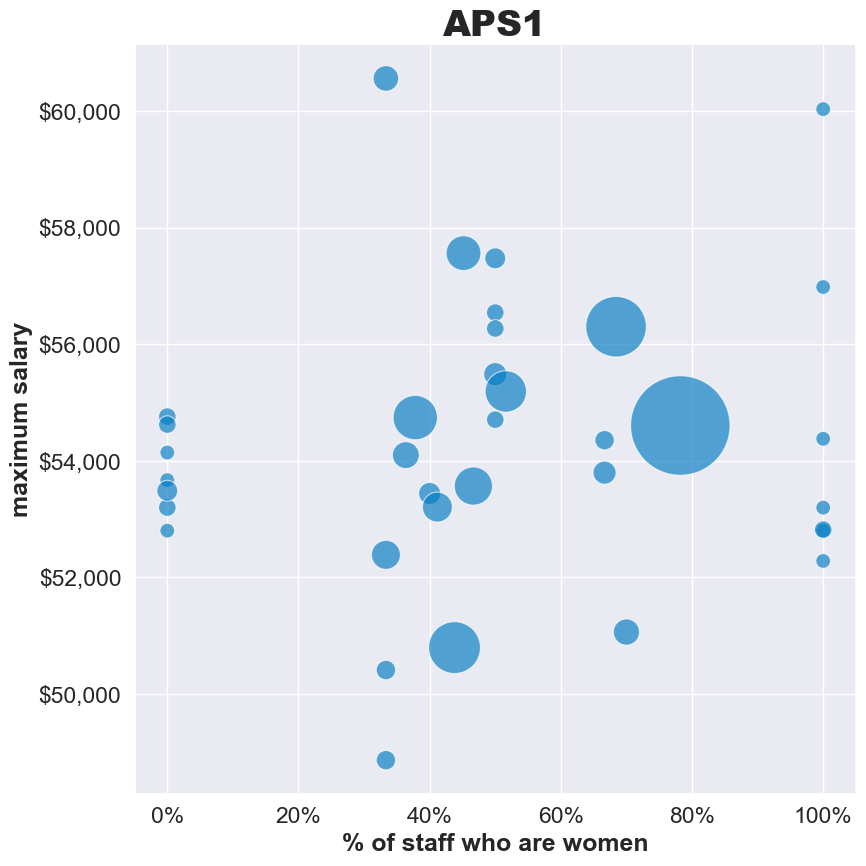

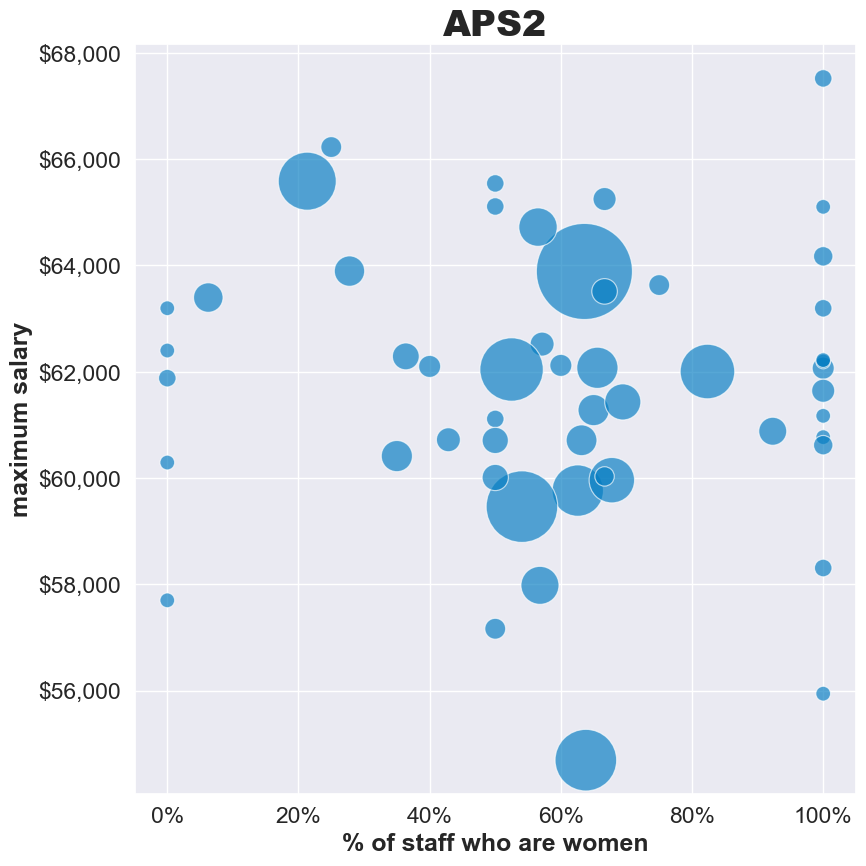

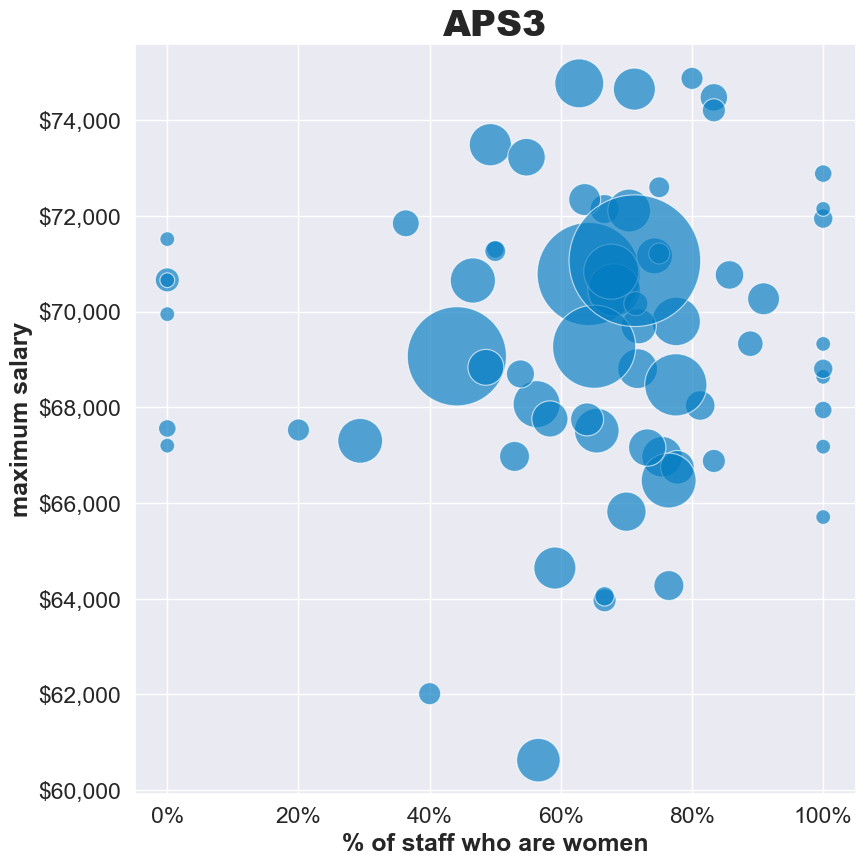

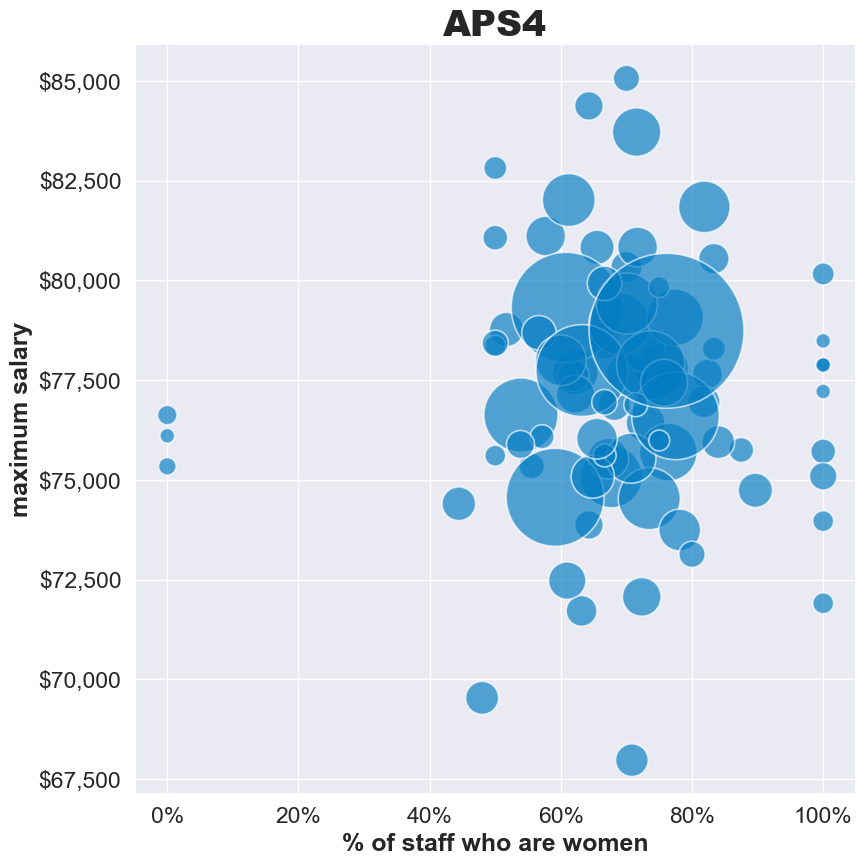

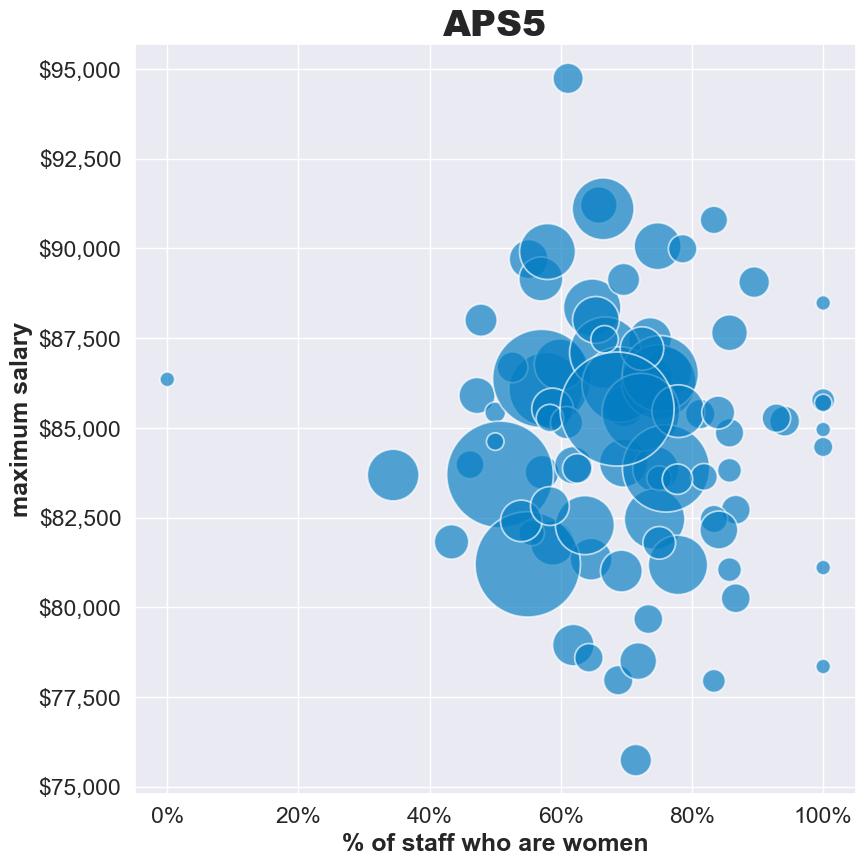

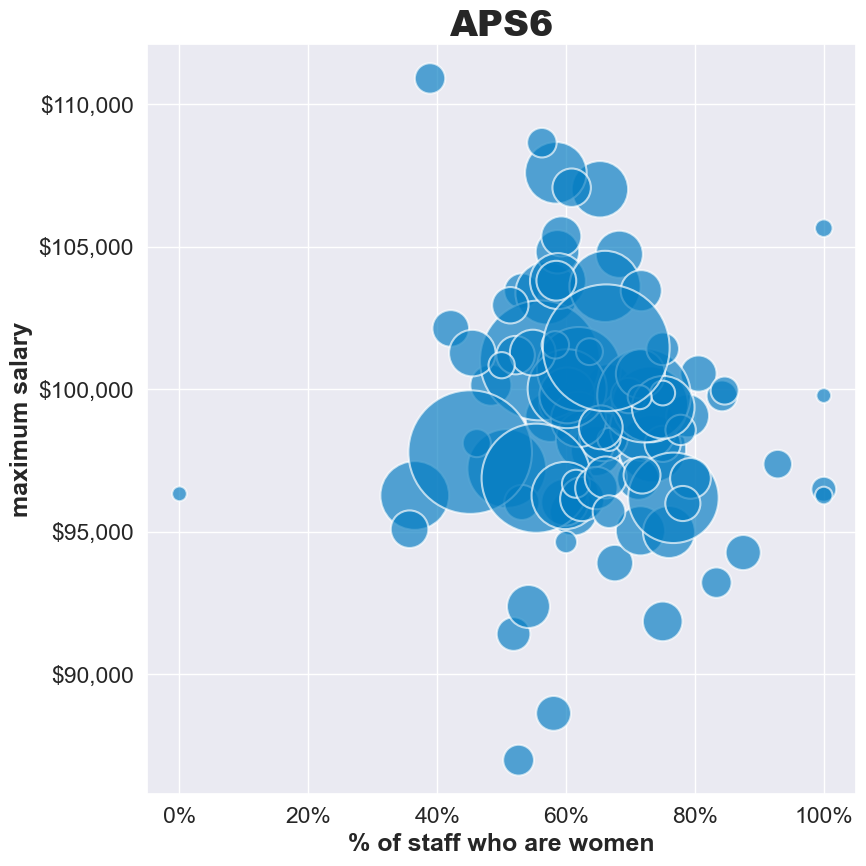

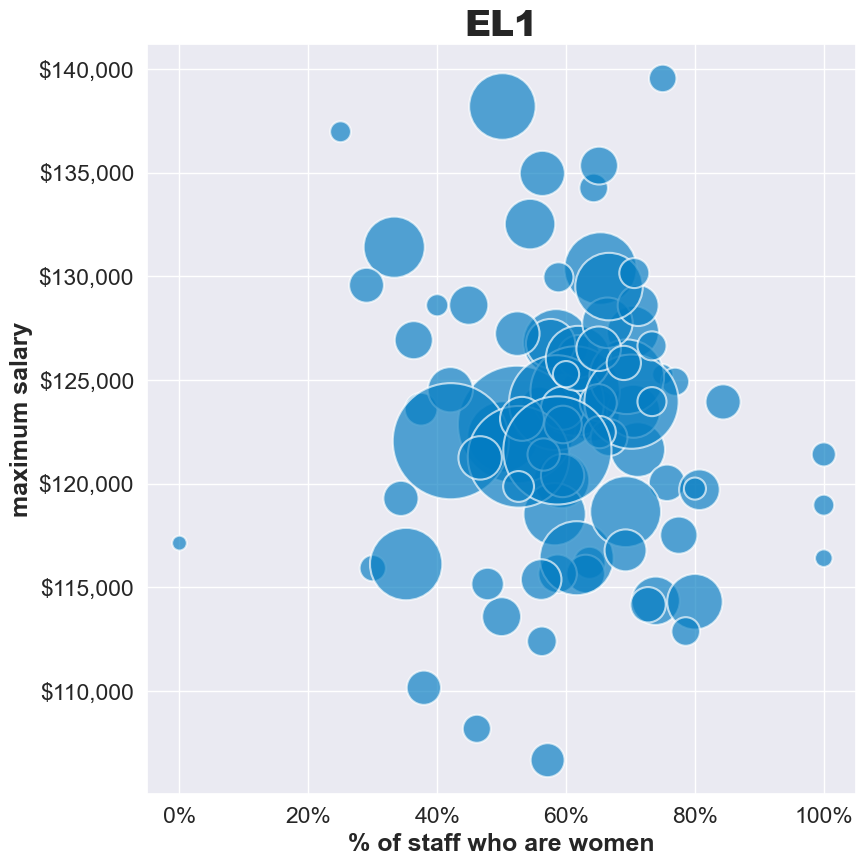

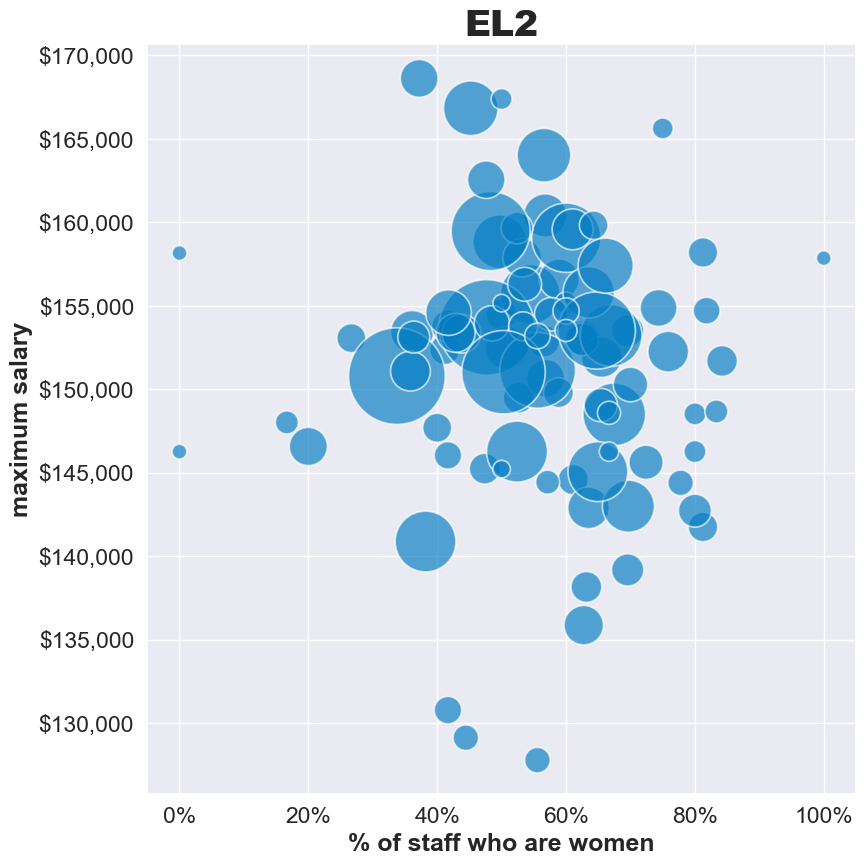

In [4]:
test_data = data[data.staff > 0]
sns.set(font_scale=1.5)

for level in test_data.level.unique():
    chart_data = test_data[test_data.level == level]
    
    fig, ax = plt.subplots(
        tight_layout=True,
        figsize=(9, 9)
    )    
    sns.scatterplot(
        x=chart_data.women,
        y=chart_data["max"],
        s=chart_data.staff.map(lambda x: np.sqrt(x / np.pi) * 200),
        alpha=(2/3),
        c="#037cc2",
        ax=ax
    )
    plt.title(level, fontweight="black", fontsize="x-large")
    plt.xlabel("% of staff who are women", fontweight="bold")
    plt.ylabel("maximum salary", fontweight="bold")
    ax.xaxis.set_major_formatter(lambda x, p: f"{x:.0%}")
    ax.yaxis.set_major_formatter(lambda x, p: f"${x:,.0f}")
    plt.savefig(f"./women_max_{level}.png")
    plt.show()


In [2]:
from sklearn.linear_model import LinearRegression

for level in data.level.unique():
    print("Testing for", level, "...")
    test_data = data[
        (data.staff > 0) &
        (data.level == level)
    ]
    y = test_data["max"]
    X = test_data[["women"]]
    model = LinearRegression().fit(X, y)
    print("R squared =", round(model.score(X, y), 3))


Testing for APS1 ...
R squared = 0.018
Testing for APS2 ...
R squared = 0.001
Testing for APS3 ...
R squared = 0.004
Testing for APS4 ...
R squared = 0.0
Testing for APS5 ...
R squared = 0.008
Testing for APS6 ...
R squared = 0.005
Testing for EL1 ...
R squared = 0.002
Testing for EL2 ...
R squared = 0.001
